## Python List

The designers of Python had many choices to make when they implemented the list data structure. Each of these choices could have an impact on how fast list operations perform. To help them make the right choices they looked at the ways that people would most commonly use the list data structure and they optimized their implementation of a list so that **the most common operations were very fast**. Of course they also tried to make the less common operations fast, but when a tradeoff had to be made the performance of a less common operation was often sacrificed in favor of the more common operation.

Two common operations are **indexing** and **assigning to an index position**. Both of these operations take the same amount of time no matter how large the list becomes. When an operation like this is independent of the size of the list they are $O(1)$.

Another very common programming task is to grow a list. There are two ways to create a longer list. You can use the append method or the concatenation operator. 
* The append method is $O(1)$. 
* However, the concatenation operator is $O(k)$ where $k$ is the size of the list that is being concatenated. 

This is important for you to know because it can help you make your own programs more efficient by choosing the right tool for the job.

Let’s look at four different ways we might generate a list of n numbers starting with 0.

In [5]:
def list_concat(k):
    l = []
    
    for i in range(k):
        l+=[i]
        
    return l

list_concat(5)

[0, 1, 2, 3, 4]

In [6]:
def list_append(n):
    l = []
    
    for i in range(n):
        l.append(i)
        
    return l

list_append(5)

[0, 1, 2, 3, 4]

In [7]:
def list_comprehend(k):
    l = [i for i in range(k)]
    
    return l

list_comprehend(5)

[0, 1, 2, 3, 4]

In [8]:
def list_range(k):
    l = list(range(k))
    
    return l

list_range(5)

[0, 1, 2, 3, 4]

#### Timing The above List methods


To capture the time it takes for each of our functions to execute we will use Python’s `timeit` module. The `timeit` module is designed to allow Python developers to make cross-platform timing measurements by running functions in a consistent environment and using timing mechanisms that are as similar as possible across operating systems.

* To use timeit you create a Timer object whose parameters are two Python statements. 
* The first parameter is a Python statement that you want to time; 
* The second parameter is a statement that will run once to set up the test. 
* The timeit module will then time how long it takes to execute the statement some number of times. By default timeit will try to run the statement one million times. When its done it returns the time as a floating point value representing the total number of seconds. However, since it executes the statement a million times you can read the result as the number of microseconds to execute the test one time. 

You can also pass timeit a named parameter called number that allows you to specify how many times the test statement is executed.

In [15]:
names = ['concat', 'append', 'comprehend', 'range']
methods = [list_concat, list_append, list_comprehend, list_range]
k = 1000000

In [47]:
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
def time_it(methods, names, k):
    time_dict = {}
    for method, name in zip(methods, names):
        start = time.time()
        method(k)
        time_dict[name] = round(time.time()-start, 3)
        
    return time_dict

In [33]:
time_dict = time_it(methods, names, k)
print(time_dict)
print()
print('min-time_dict:', min(time_dict, key=time_dict.get))
print()
print('max-time_dict:', max(time_dict, key=time_dict.get))

{'concat': 0.133, 'append': 0.102, 'comprehend': 0.068, 'range': 0.028}

min-time_dict: range

max-time_dict: concat


**From the above experiment, after running the four methods `concat`, `append`, `comprehend`, `range` for 1 million secs each...**

* Range has the best time
* Concat has the worst time $O(k)$
* Append has the second worst time $O(1)$
* While comprehension has the 2nd best time

It is interesting to note that the list comprehension is almost twice as fast as a for loop with an append operation

## Big-O Efficiency of Basic Lists Operations


| Operation | Big-O Efficiency |
| --- | --- |
| `index[]` | $O(1)$ |
| `index-assignment` | $O(1)$ |
| `append` | $O(1)$ |
| `pop()` | $O(1)$ |
| `pop(i)` | $O(n)$ |
| `insert(i,item)` | $O(n)$ |
| `del operator` | $O(n)$ |
| `iteration` | $O(n)$ |
| `contains (in)` | $O(n)$ |
| `get slice[i:j]` | $O(k)$ |
| `del slice` | $O(n)$ |
| `set slice` | $O(n+k)$ |
| `reverse` | $O(n)$ |
| `concatenate` | $O(k)$ |
| `sort` | $O(nlog(n))$ |
| `multiply` | $O(nk)$ |

As a way of demonstrating this difference in performance let’s do another experiment using the timeit module. Our goal is to be able to verify the performance of the pop operation on a list of a known size when the program pops from the end of the list, and again when the program pops from the beginning of the list. We will also want to measure this time for lists of different sizes. What we would expect to see is that the time required to pop from the end of the list will stay constant even as the list grows in size, while the time to pop from the beginning of the list will continue to increase as the list grows.

In [37]:
popzero = timeit.Timer('x.pop(0)', 'from __main__ import x')
popend = timeit.Timer('x.pop()', 'from __main__ import x')
x = list(range(2000000))

In [38]:
popzero.timeit(number=1000)

1.2322690000000875

In [39]:
popend.timeit(number=1000)

0.00030679999326821417

In [40]:
print(popend)

While our first test does show that pop(0) is indeed slower than pop(), it does not validate the claim that pop(0) is $O(n)$ while pop() is $O(1)$. To validate that claim we need to look at the performance of both calls over a range of list sizes.

The statement `from __main__ import x`. Although we did not define a function $x$, we do want to be able to use the list object $x$ in our test. This approach allows us to time just the single pop statement and get the most accurate measure of the time for that single operation.

In this case the statement `from __main__ import x` imports $x$ from the `__main__` namespace into the namespace that timeit sets up for the timing experiment. The timeit module does this because it wants to run the timing tests in an environment that is uncluttered by any stray variables you may have created, that may interfere with your function’s performance in some unforeseen way.

In [42]:
zero_list = []
end_list = []
names = ['Pop-zero', 'Pop-end']

for i in range(1000000,30000001,1000000):
    x = list(range(i))
    pt = popend.timeit(number=1000)
    x = list(range(i))
    pz = popzero.timeit(number=1000)
    zero_list.append(pz)
    end_list.append(pt)
    print("popzero: %10.5f, popend: %10.5f" %(pz,pt))

popzero:    0.51186, popend:    0.00008
popzero:    1.37298, popend:    0.00007
popzero:    1.90091, popend:    0.00011
popzero:    2.59171, popend:    0.00016
popzero:    3.28495, popend:    0.00018
popzero:    4.03979, popend:    0.00007
popzero:    4.67931, popend:    0.00020
popzero:    5.34931, popend:    0.00007
popzero:    6.05935, popend:    0.00009
popzero:    7.42392, popend:    0.00008
popzero:    7.71607, popend:    0.00028
popzero:    8.18832, popend:    0.00008
popzero:    9.31834, popend:    0.00017
popzero:    9.75185, popend:    0.00008
popzero:   10.46365, popend:    0.00012
popzero:   11.51575, popend:    0.00019
popzero:   11.88981, popend:    0.00008
popzero:   12.31632, popend:    0.00007
popzero:   13.01674, popend:    0.00008
popzero:   13.81356, popend:    0.00008
popzero:   15.19189, popend:    0.00008
popzero:   15.98725, popend:    0.00009
popzero:   16.49890, popend:    0.00009
popzero:   17.03064, popend:    0.00008
popzero:   17.87214, popend:    0.00008


You can see that as the list gets longer and longer from 1 million to 30 million items, the time it takes to `pop(0)` also increases while the time for `pop()` stays very flat. This is exactly what we would expect to see for a $O(n)$ and $O(1)$ algorithm. See the visual chart below

In [45]:
def plotLines(*args, title=None, names=[]):
    """Plot lines from respective arrays
    """
    size = len(args[0])
    for arr in args:
        assert len(arr) == size, 'Each Item Must Have Same Len'
        
    df_list = [lyst for lyst in args]
    df = pd.DataFrame(df_list).T
    df.columns = names
    df.plot()
    plt.title(title, fontweight='bold')

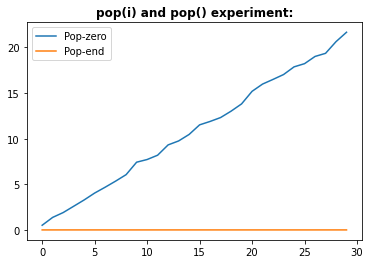

In [49]:
title = 'pop(i) and pop() experiment:'
plotLines(zero_list, end_list, title=title, names=names)

**Let's see a plot of the different timings for the above four list methods**

In [102]:
app_list = []
conc_list = []
comp_list = []
rang_list = []
names = ['Append', 'Concat', 'Comprehend', 'Range']

def execute(lyst, method, n=None):
    start = time.time()
    method(n)
    end = round(time.time()-start, 2)
    lyst.append(end)

In [103]:
for n in range(150000,4500001,150000):
    execute(app_list, list_append, n=n)
    execute(conc_list, list_concat, n=n)
    execute(comp_list, list_comprehend, n=n)
    execute(rang_list, list_range, n=n)
print('Done')

Done


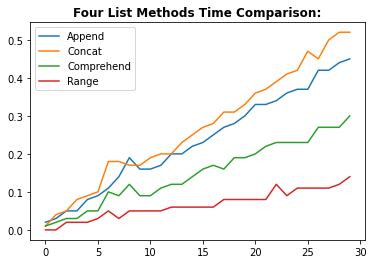

In [104]:
title = 'Four List Methods Time Comparison:'
plotLines(app_list, conc_list, comp_list, rang_list, title=title, names=names)